In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels as smt

In [2]:
df_global_warming = pd.read_csv(r"/Users/vyadav/Downloads/GlobalTemperatures.csv")

In [3]:
df_global_warming.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [4]:
df_global_warming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
#To find missing value count
df_global_warming.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [6]:
df_main = df_global_warming.copy() 

In [7]:
# Dropping columns with high cardinality
df_global_warming =  df_global_warming.drop(columns=["LandAverageTemperatureUncertainty","LandMaxTemperatureUncertainty","LandMinTemperatureUncertainty",
                          "LandAndOceanAverageTemperatureUncertainty"])


In [8]:
#Format Conversion
def ConvertCelsiusToFarhenheit(x):
    x = (x*1.8)+32
    return float(x)

In [9]:
df_global_warming['LandAverageTemperature'] = df_global_warming['LandAverageTemperature'].apply(ConvertCelsiusToFarhenheit)
df_global_warming['LandMaxTemperature'] = df_global_warming['LandMaxTemperature'].apply(ConvertCelsiusToFarhenheit)
df_global_warming['LandMinTemperature'] = df_global_warming['LandMinTemperature'].apply(ConvertCelsiusToFarhenheit)
df_global_warming['LandAndOceanAverageTemperature'] = df_global_warming['LandAndOceanAverageTemperature'].apply(ConvertCelsiusToFarhenheit)


In [10]:
#Data format conversion
df_global_warming["dt"] = pd.to_datetime(df_global_warming["dt"])
df_global_warming["Month"] = df_global_warming["dt"].dt.month
df_global_warming["Year"] = df_global_warming["dt"].dt.year
df_global_warming = df_global_warming.drop("dt", axis=1)
df_global_warming = df_global_warming.drop("Month", axis=1)
df_global_warming = df_global_warming[df_global_warming.Year >=1850]

In [11]:
df_global_warming = df_global_warming.set_index(["Year"])

In [12]:
df_global_warming =  df_global_warming.dropna()

In [13]:
df_global_warming.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126


In [14]:
df_global_warming.shape

(1992, 4)

In [15]:
#check for NULL values in processed data


In [16]:
df_global_warming.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

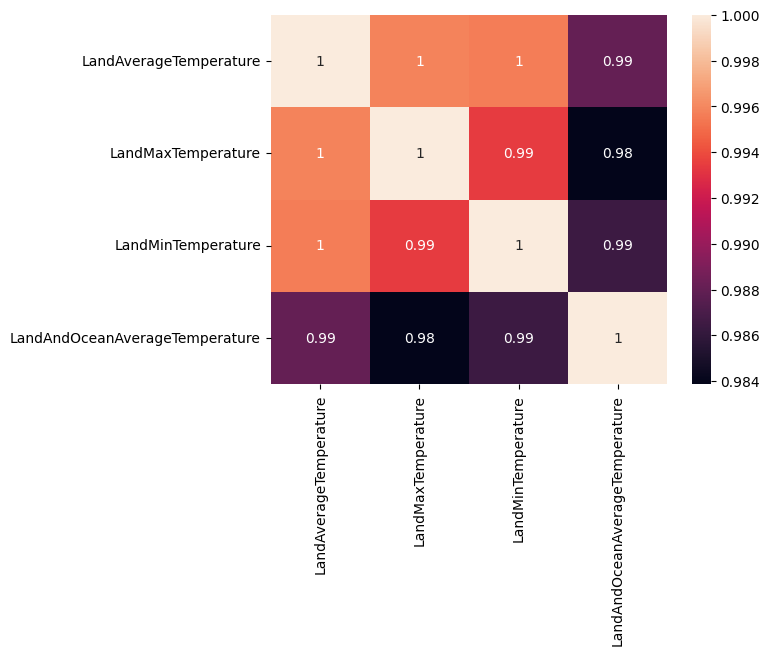

In [17]:
temp_corrmatrix = df_global_warming.corr()
sns.heatmap(temp_corrmatrix,annot=True)
plt.show()

In [18]:
#EDA

/var/folders/nv/d178h6vx65759jhjz0z2gr080000gn/T/ipykernel_21837/1176433750.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global_warming['LandAverageTemperature'], legend=False, color="brown", shade=True)


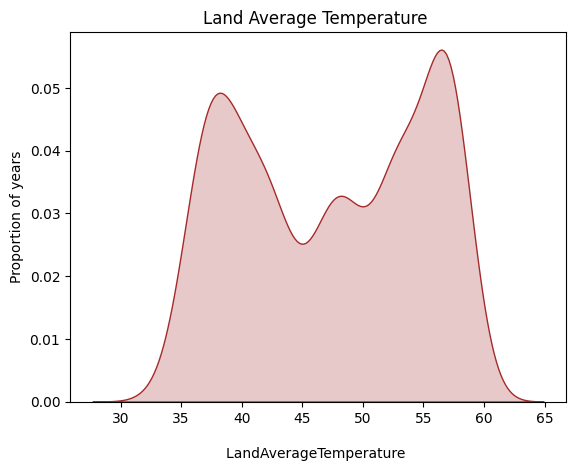

In [19]:
df_global_warming.reset_index()
sns.kdeplot(df_global_warming['LandAverageTemperature'], legend=False, color="brown", shade=True)
plt.xlabel("\nLandAverageTemperature ")
plt.ylabel("Proportion of years")
plt.title("Land Average Temperature ")
plt.show()

/var/folders/nv/d178h6vx65759jhjz0z2gr080000gn/T/ipykernel_21837/7316675.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global_warming['LandMaxTemperature'], legend=False, color="brown", shade=True)


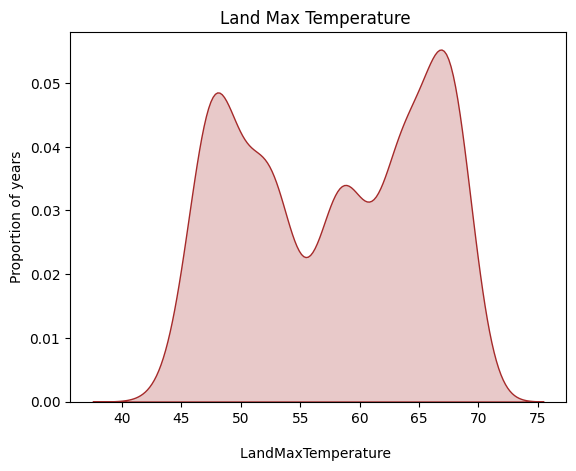

In [20]:
sns.kdeplot(df_global_warming['LandMaxTemperature'], legend=False, color="brown", shade=True)
plt.xlabel("\nLandMaxTemperature ")
plt.ylabel("Proportion of years")
plt.title("Land Max Temperature ")
plt.show()

/var/folders/nv/d178h6vx65759jhjz0z2gr080000gn/T/ipykernel_21837/3765742154.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_global_warming['LandMinTemperature'], legend=False, color="brown", shade=True)


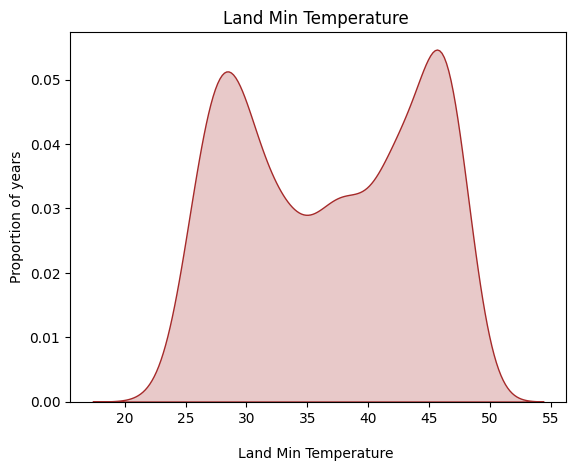

In [21]:
sns.kdeplot(df_global_warming['LandMinTemperature'], legend=False, color="brown", shade=True)
plt.xlabel("\nLand Min Temperature ")
plt.ylabel("Proportion of years")
plt.title("Land Min Temperature ")
plt.show()

In [22]:
#Separating out features

In [23]:
#Target Vector Creation
target = "LandAndOceanAverageTemperature"
Y = df_global_warming[target]
X = df_global_warming[["LandAverageTemperature","LandMaxTemperature","LandMinTemperature"]]

In [24]:
X_train,  X_val,Y_train, Y_val = train_test_split(X,Y,test_size=0.25,random_state=42)

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(1494, 3)
(1494,)
(498, 3)
(498,)


In [26]:
#Random Forest Regression

In [27]:
RF_model = make_pipeline(SelectKBest(k="all"),StandardScaler(), RandomForestRegressor(n_estimators=100, max_depth=50,
                                                                                      random_state =77, n_jobs=-1))

In [28]:
RF_model.fit(X_train,Y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [29]:
y_pred = [Y_train.mean()]*len(Y_train)

In [30]:
train_RF_MAE = mean_absolute_error(Y_train,RF_model.predict(X_train))

In [31]:
val_RF_MAE = mean_absolute_error(Y_val,RF_model.predict(X_val))

In [32]:
print("Train Random Forest Regressor MAE ==>",train_RF_MAE)

Train Random Forest Regressor MAE ==> 0.09093210843373735


In [33]:
print("Validation Random Forest Regressor MAE ==>",val_RF_MAE)

Validation Random Forest Regressor MAE ==> 0.24454330120481757


In [34]:
y_pred = RF_model.predict(X_val)

In [35]:
errors = abs(y_pred - Y_val)

In [36]:
#Calculating mean absolute percentage
mape = 100 * (errors/Y_train)

In [37]:
accuracy = 100 - np.mean(mape)

In [38]:
print("Random Forest Accuracy Model Prediction Accuracy ===",accuracy)

Random Forest Accuracy Model Prediction Accuracy === 99.58153451138278


In [39]:
#LSTM Modelling

In [40]:
df_global_temp = pd.read_csv(r"/Users/vyadav/Downloads/gmst-assessment.csv", usecols=[1], engine='python')
dataset = df_global_temp.values
dataset = dataset.astype('float32')

In [41]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [42]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [44]:

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [45]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [46]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/Users/vyadav/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 1s - 5ms/step - loss: 0.0279
Epoch 2/100
112/112 - 0s - 632us/step - loss: 0.0106
Epoch 3/100
112/112 - 0s - 617us/step - loss: 0.0095
Epoch 4/100
112/112 - 0s - 676us/step - loss: 0.0091
Epoch 5/100
112/112 - 0s - 627us/step - loss: 0.0086
Epoch 6/100
112/112 - 0s - 612us/step - loss: 0.0082
Epoch 7/100
112/112 - 0s - 631us/step - loss: 0.0079
Epoch 8/100
112/112 - 0s - 669us/step - loss: 0.0073
Epoch 9/100
112/112 - 0s - 616us/step - loss: 0.0069
Epoch 10/100
112/112 - 0s - 608us/step - loss: 0.0065
Epoch 11/100
112/112 - 0s - 645us/step - loss: 0.0062
Epoch 12/100
112/112 - 0s - 625us/step - loss: 0.0059
Epoch 13/100
112/112 - 0s - 614us/step - loss: 0.0056
Epoch 14/100
112/112 - 0s - 609us/step - loss: 0.0053
Epoch 15/100
112/112 - 0s - 633us/step - loss: 0.0051
Epoch 16/100
112/112 - 0s - 612us/step - loss: 0.0050
Epoch 17/100
112/112 - 0s - 645us/step - loss: 0.0048
Epoch 18/100
112/112 - 0s - 669us/step - loss: 0.0046
Epoch 19/100
112/112 - 0s - 678us/step - loss: 0.00

In [47]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train Score: 0.10 RMSE
Test Score: 0.19 RMSE


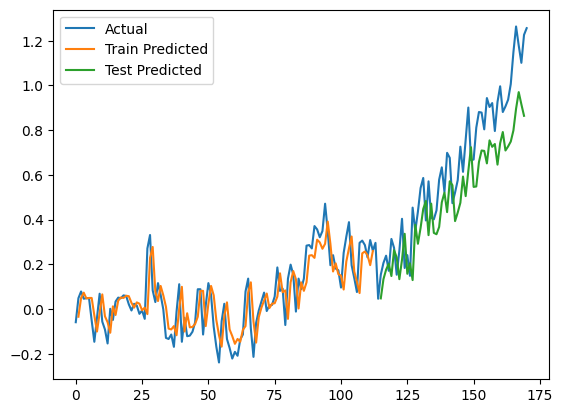

In [48]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Actual")
plt.plot(trainPredictPlot,label="Train Predicted")
plt.plot(testPredictPlot,label="Test Predicted")
plt.legend(loc="upper left")
plt.show() 